In [ ]:
!pip install --upgrade plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/Unemployment in India.csv")

In [ ]:
df.shape

(768, 7)

In [ ]:
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(740, 7)

In [ ]:
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
df.rename(columns = {'Region':'States'}, inplace = True)

<ipython-input-8-33c64e9f6102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Region':'States'}, inplace = True)


In [ ]:
df.columns.values

array(['States', ' Date', ' Frequency',
       ' Estimated Unemployment Rate (%)', ' Estimated Employed',
       ' Estimated Labour Participation Rate (%)', 'Area'], dtype=object)

In [ ]:
print(df['States'].unique())

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']


In [ ]:
Region = []

for row in df['States']:
  if row in ("Uttar Pradesh", "Uttarakhand", "Punjab", "Jammu & Kashmir", "Rajasthan", "Himachal Pradesh", "Delhi", "Haryana", "Chandigarh"):
    Region.append('North')
  elif row in ("Gujarat", "Madhya Pradesh", "Chhattisgarh", "Maharashtra", "Goa"):
    Region.append('West')
  elif row in ("Tripura", "Sikkim", "Assam", "Meghalaya"):
    Region.append('Northeast')
  elif row in ("Jharkhand", "Bihar", "West Bengal", "Odisha"):
    Region.append('East')
  elif row in ("Puducherry", "Tamil Nadu", "Kerala", "Andhra Pradesh", "Karnataka", "Telangana"):
    Region.append('South')
  print(row)

print(Region)

df.insert(1,"Region", Region)

Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Andhra Pradesh
Assam
Assam
Assam
Assam
Assam
Assam
Assam
Assam
Assam
Assam
Assam
Assam
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Bihar
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Chhattisgarh
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Delhi
Goa
Goa
Goa
Goa
Goa
Goa
Goa
Goa
Goa
Goa
Goa
Goa
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Gujarat
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Haryana
Himachal Pradesh
Himachal Pradesh
Himachal Pradesh
Himachal Pradesh
Himachal Pradesh
Himachal Pr

In [ ]:
df.shape

(740, 8)

In [ ]:
# df.columns= ["Region","Date","Frequency",
#                "Estimated Unemployment Rate (%)",
#                "Estimated Employed",
#                "Estimated Labour Participation Rate"]

<ipython-input-14-54270d55c025>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-14-54270d55c025>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


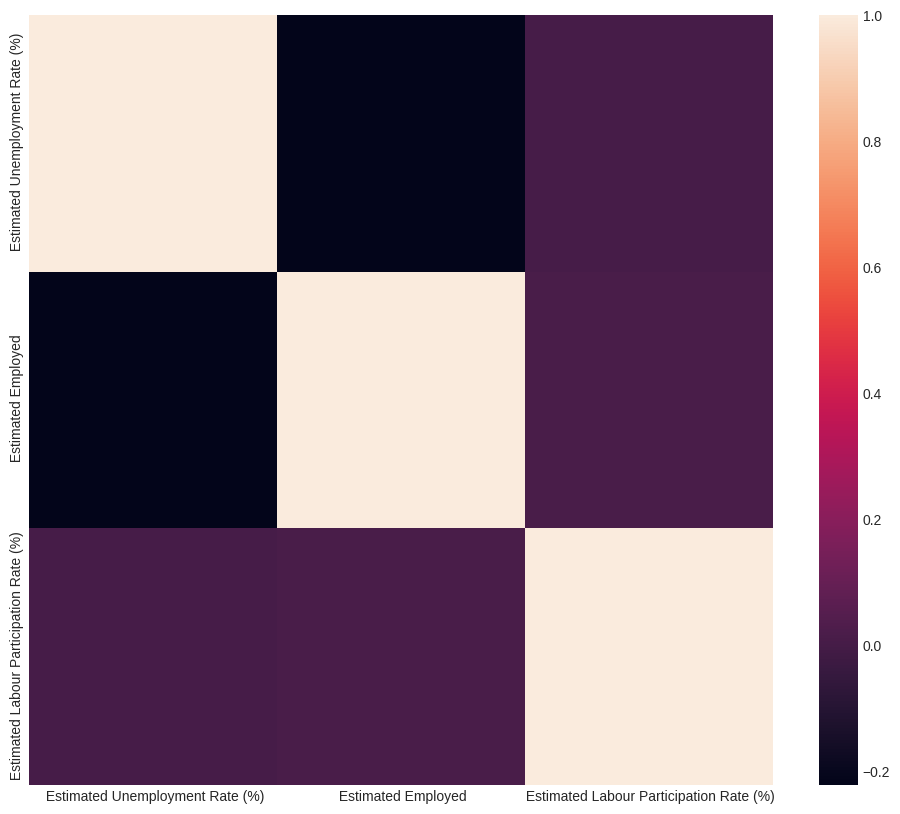

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr())
plt.show()

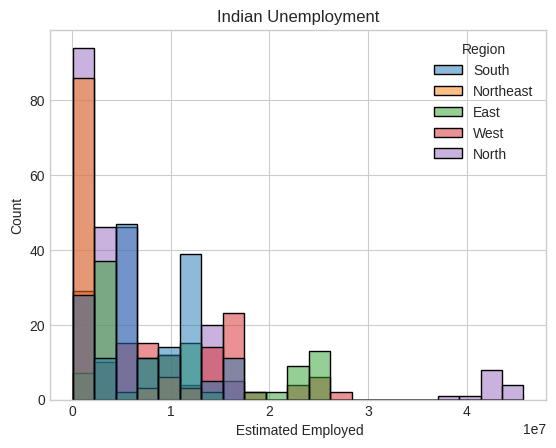

In [ ]:
# df.columns= ["Region","Date","Frequency",
#                "Estimated Unemployment Rate (%)",
#                "Estimated Employed",
#                "Estimated Labour Participation Rate"]
plt.title("Indian Unemployment")
sns.histplot(x=" Estimated Employed", hue="Region", data=df)
plt.show()

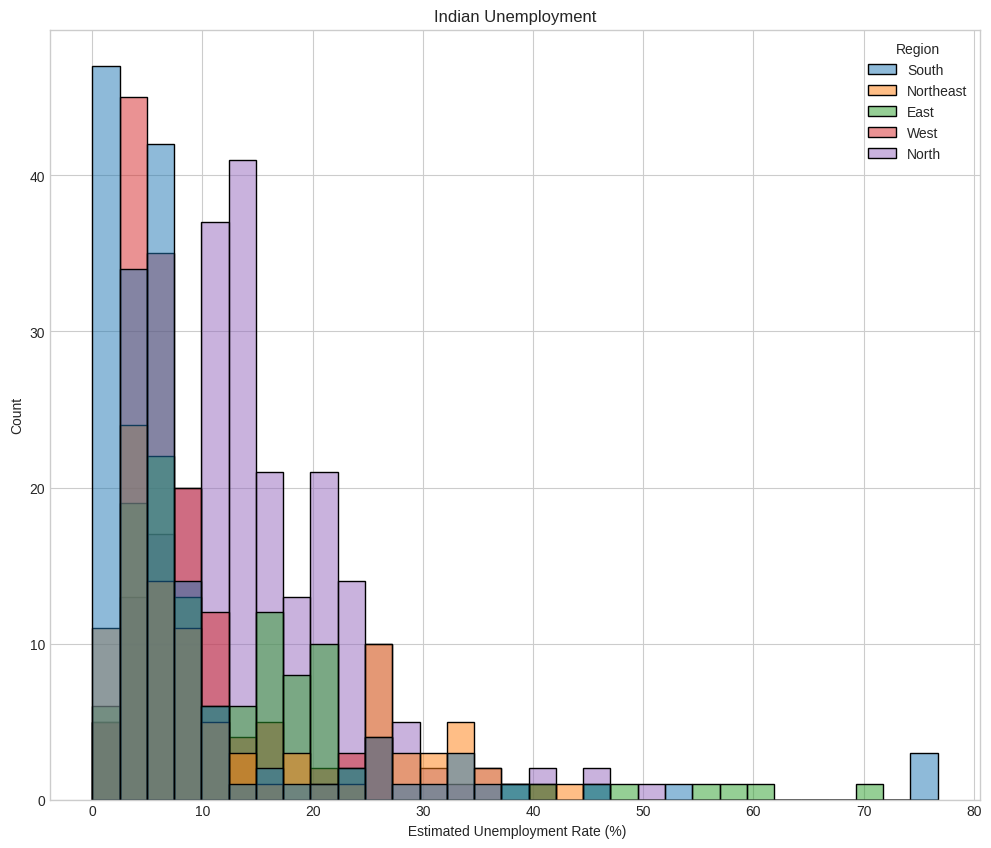

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x=" Estimated Unemployment Rate (%)", hue="Region", data=df)
plt.show()

In [ ]:
unemploment = df[["States", "Region", " Estimated Unemployment Rate (%)"]]
figure = px.sunburst(unemploment, path=["Region", "States"],
                     values=" Estimated Unemployment Rate (%)",
                     width=700, height=700, color_continuous_scale="RdY1Gn",
                     title="Unemployment Rate in India")
figure.show()